<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Смотрим-баланс-&quot;классов&quot;" data-toc-modified-id="Смотрим-баланс-&quot;классов&quot;-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Смотрим баланс "классов"</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('./Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Столбец <b>Tenure</b> содержит пропуски, заполним их на основе столбцов <b>Geography</b> и <b>Gender</b>, присвоив ему среднее значение.

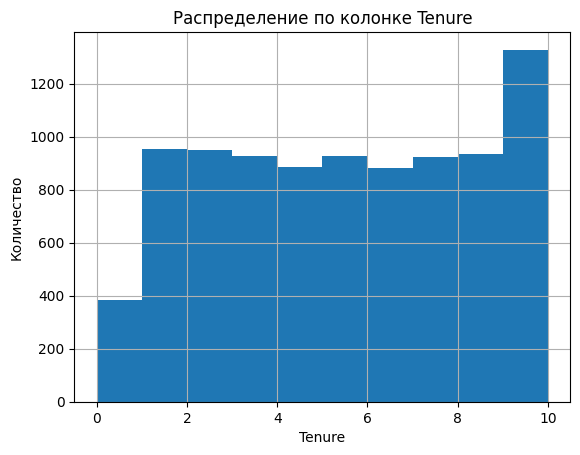

In [4]:
# проверяем распределение до заполнения пропусков
data['Tenure'].hist()
plt.title('Распределение по колонке Tenure')
plt.xlabel('Tenure')
plt.ylabel('Количество')
plt.show()

In [5]:
# заполняем пропуски средним значением
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean())

# ниже код предназначен для экспиремента (см. 4 пункт Примечание автора)

#data['Tenure'] = data['Tenure'].fillna(data.groupby(['Geography', 'Gender'])['Tenure'].transform('mean'))
#data = data.dropna(subset=['Tenure'])
#data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean())
#data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

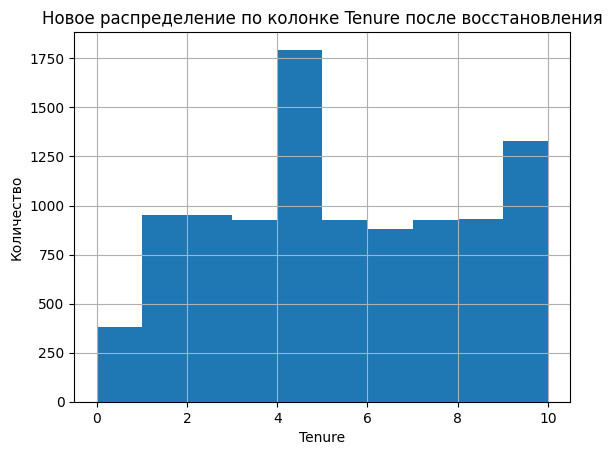

In [6]:
# проверяем распределение после заполнения пропусков

data['Tenure'].hist()
plt.title('Новое распределение по колонке Tenure после восстановления')
plt.xlabel('Tenure')
plt.ylabel('Количество')
plt.show()

## Исследование задачи

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Есть два столбца <b>Geography</b> и <b>Gender</b>, которые являются строковыми. При помощи метода <b>One-Hot Encoding</b> преобразуем их в числовые:

In [8]:
# используем One-Hot Encoding
data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True)

Убираем колонки <b>RowNumber</b>, <b>CustomerId</b> и <b>Surname</b>, так как они дальше не потребуются.

In [9]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

### Смотрим баланс "классов"

In [10]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

В анализируемой выборке количество тех, кто покинул банк заметно ниже (<b>в 4 раза</b>), чем тех кто - нет.

### Обучение моделей

In [11]:
# нам нужно определить факт ухода клиента, либо да, либо нет - это классификация

features = data.drop(['Exited'], axis=1)
target = data['Exited']

# делим для валидации
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
# делим для тестирования 
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

# данные разделены в пропорции 3:1:1
print(f'Обучающая выборка:', features_train.shape[0])
print(f'Валидационная выборка:', features_test.shape[0])
print(f'Тестовая выборка:', features_valid.shape[0])

Обучающая выборка: 6000
Валидационная выборка: 2000
Тестовая выборка: 2000


Построим три модели: 
* DecisionTreeClassifier - дерево решений
* RandomForestClassifier - случайный лес
* LogisticRegression - логистическая регрессия

In [12]:
# создаём вспомогательные методы для хранения лучших метрик
dict_score = {} # переменная для хранения метрик

def best_score(classifier_name, score, method):
    """
    Сохранение лучшей метрики для метода
    
    Параметры:
    ----------
    classifier_name: string - имя классификатора
    score: float - значение метрики
    method: string - метод или группа в рамках, которой производится вычисление 
    """
    item = dict_score.get(method)
    if item:
        if score > item[1]:
            dict_score[method] = [classifier_name, score]
    else:
        dict_score[method] = [classifier_name, score]
        
def get_best_score(method):
    """
    Получение лучшей метрики метода
    
    Параметры:
    ----------
    method: string - метод или группа в рамках, которой производится вычисление 
    
    Результаты
    ----------
    classifier_name: string - имя классификатора
    score: float - значение метрики
    """
    item = dict_score.get(method)
    if item:
        return item[0], item[1]
    else:
        return 'unknown', 0.0

def info_best_score(method):
    """
    Вывод информации о наилучшей метрики
    
    Параметры:
    ----------
    method: string - метод или группа в рамках, которой производится вычисление 
    """
    classifier_name, score = get_best_score(method) 
    print(f'Вывод: наилучшую метрику F1-мера показал классификатор {classifier_name} со значением {round(score, 3)}')

In [13]:
# создаём вспомогательные методы для анализа качества моделей DecisionTreeClassifier
def decisionTreeClassifierScore(features_train, target_train, features_valid, target_valid, max_depth=20, class_weight=None):
    """Поиск оптимального качества модели DecisionTreeClassifier
    
    Параметры:
    ----------
    features_train: DataFrame - обучающая выборка
    target_train: DataFrame - целевой признак обучающей выборки
    features_valid: DataFrame - валидационная выборка
    target_valid: DataFrame - целевой признак валидационной выборки
    max_depth: int, default=20 - глубина обучения
    class_weight: string, default=None - баланс классов
    
    Результаты
    ----------
    best_f1_score: array - метрика F1-меры
    best_auc_roc_score: array - метрика AUC-ROC
    chart_data: array - данные для построения графика
    """
    best_f1_score = [0, 0] # F1-мера и Глубина
    best_auc_roc_score = [0, 0] # AUC-ROC и Глубина
    chart_data = []

    for depth in range(1, max_depth, 1):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=class_weight)
        model.fit(features_train, target_train)

        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)

        probabilities_valid = model.predict_proba(features_valid)
        auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
        
        chart_data.append([depth, f1, auc_roc])

        if f1 > best_f1_score[0]:
            best_f1_score = [f1, depth]
        
        if auc_roc > best_auc_roc_score[0]:
            best_auc_roc_score = [auc_roc, depth]
    
    return best_f1_score, best_auc_roc_score, chart_data

def decisionTreeClassifierChart(data):
    """Построение визуального графика для просмотра качества модели DecisionTreeClassifier
    
    Параметры:
    ----------
    data: array - массив данных из трёх колонок: max_depth, F1-мера, AUC-ROC
    """
    
    df = pd.DataFrame(data, columns=['max_depth', 'f1', 'auc_roc'])
    plt.title('Распределение метрик качества')
    plt.xlabel('Глубина обучения')
    plt.ylabel('Значение метрики')
    plt.plot(df['max_depth'], df['f1'], label = "F1-мера")
    plt.plot(df['max_depth'], df['auc_roc'], label = "AUC-ROC")
    plt.legend()
    plt.show()

def decisionTreeClassifierInfo(f1_score, auc_roc_score):
    """Вывод
    
    Параметры:
    ----------
    f1_score: array - показатели для F1-меры
    auc_roc_score: array - показатели для AUC-ROC 
    """
    print(f'''Для классификатора DecisionTreeClassifier:
 - лучшее качество F1-меры равно {round(f1_score[0], 3)}, которое было найдено при гиперпараметре max_depth равном {f1_score[1]};
 - лучшее качество AUC-ROC равно {round(auc_roc_score[0], 3)}, которое было найдено при гиперпараметре max_depth равном {auc_roc_score[1]}.''')

#### DecisionTreeClassifier

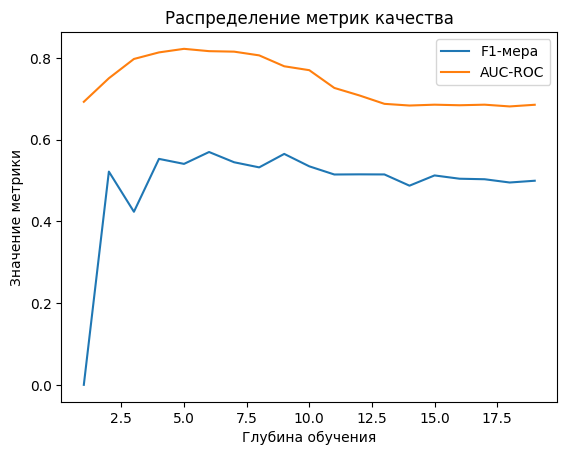

In [14]:
# используем созданный ранее метод
dtc_best_f1_score, dtc_best_auc_roc_score, chart_data = decisionTreeClassifierScore(features_train, target_train, features_valid, target_valid, max_depth=30)
# строим график
decisionTreeClassifierChart(chart_data)

In [15]:
# сохраняем лучший результат
best_score('DecisionTreeClassifier', dtc_best_f1_score[0], 'Без учёта дисбаланса')
# вывод информации
decisionTreeClassifierInfo(dtc_best_f1_score, dtc_best_auc_roc_score)

Для классификатора DecisionTreeClassifier:
 - лучшее качество F1-меры равно 0.57, которое было найдено при гиперпараметре max_depth равном 6;
 - лучшее качество AUC-ROC равно 0.822, которое было найдено при гиперпараметре max_depth равном 5.


#### RandomForestClassifier

In [16]:
# создаём вспомогательные методы для анализа качества моделей RandomForestClassifier

def randomForestClassifierScore(features_train, target_train, features_valid, target_valid, max_depth=10, n_estimators=30, class_weight=None):
    """Поиск оптимального качества модели RandomForestClassifier
    
    Параметры:
    ----------
    features_train: DataFrame - обучающая выборка
    target_train: DataFrame - целевой признак обучающей выборки
    features_valid: DataFrame - валидационная выборка
    target_valid: DataFrame - целевой признак валидационной выборки
    max_depth: int, default=10 - глубина обучения
    n_estimators: int, default=30 - количество лесов
    class_weight: string, default=None - баланс классов
    
    Результаты
    ----------
    best_f1_score: array - метрика F1-меры
    best_auc_roc_score: array - метрика AUC-ROC
    f1_chart_data: array - данные для построения графика по метрике F1-мера
    f1_chart_data: array - данные для построения графика по метрике AUC-ROC
    """
    
    best_f1_score = [0, 0, 0] # F1-мера, Глубина и леса
    best_auc_roc_score = [0, 0, 0] # AUC-ROC, Глубина и леса
    f1_chart_data = []
    auc_roc_chart_data = []
    
    for est in reversed(range(1, n_estimators, 2)):
        f1_data = []
        auc_roc_data = []

        for depth in range(1, max_depth):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight=class_weight)
            model.fit(features_train, target_train)

            predictions = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions)

            probabilities_valid = model.predict_proba(features_valid)
            auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

            if f1 > best_f1_score[0]:
                best_f1_score = [f1, depth, est]

            if auc_roc > best_auc_roc_score[0]:
                best_auc_roc_score = [auc_roc, depth, est]

            f1_data.append(f1)
            auc_roc_data.append(auc_roc)

        f1_chart_data.append(f1_data)
        auc_roc_chart_data.append(auc_roc_data)

    return best_f1_score, best_auc_roc_score, f1_chart_data, auc_roc_chart_data

def randomForestClassifierChart(f1_data, auc_roc_data, max_depth=10, n_estimators=30):
    """Построение визуального графика для просмотра качества модели RandomForestClassifier
    
    Параметры:
    ----------
    f1_data: array - массив данных для метрики F1-мера
    auc_roc_data: array - массив данных для метрики AUC-ROC
    """
    
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 6)) 

    df = pd.DataFrame(f1_data, index=list(reversed(range(1, n_estimators, 2))), columns=list(range(1, max_depth)))
    sbn.heatmap(df, ax=axs[0])
    axs[0].set_title('Распределение метрики F1-мера')
    axs[0].set_xlabel('Глубина обучения')
    axs[0].set_ylabel('Количество деревьев')

    df = pd.DataFrame(auc_roc_data, index=list(reversed(range(1, n_estimators, 2))), columns=list(range(1, max_depth)))
    sbn.heatmap(df, ax=axs[1])
    axs[1].set_title('Распределение метрики AUC-ROC')
    axs[1].set_xlabel('Глубина обучения')
    axs[1].set_ylabel('Количество деревьев')

    plt.show()

def randomForestClassifierInfo(f1_score, auc_roc_score):
    """Вывод для модели RandomForestClassifier
    
    Параметры:
    ----------
    f1_score: array - показатели для F1-меры
    auc_roc_score: array - показатели для AUC-ROC 
    """
    print(f'''Для классификатора RandomForestClassifier:
 - лучшее качество F1-меры равно {round(f1_score[0], 3)}, которое было найдено при гиперпараметрах n_estimators равном {round(f1_score[2], 3)} и max_depth равном {f1_score[1]};
 - лучшее качество AUC-ROC равно {round(auc_roc_score[0], 3)}, которое было найдено при гиперпараметрах n_estimators равном {round(auc_roc_score[2], 3)} и max_depth равном {auc_roc_score[1]}.''')

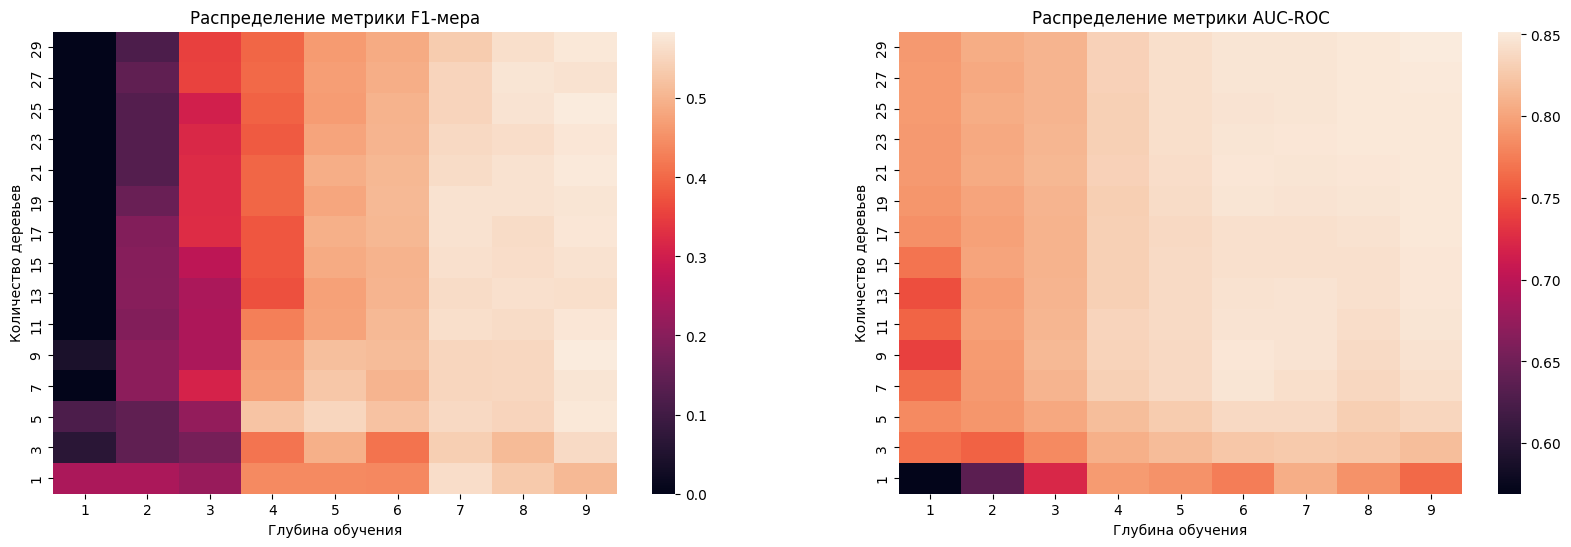

In [17]:
# используем созданный ранее метод
rfc_best_f1_score, rfc_best_auc_roc_score, f1_chart_data, auc_roc_chart_data = randomForestClassifierScore(features_train, target_train, features_valid, target_valid)
# строим график
randomForestClassifierChart(f1_chart_data, auc_roc_chart_data)

In [18]:
# сохраняем лучший результат
best_score('RandomForestClassifier', rfc_best_f1_score[0], 'Без учёта дисбаланса')
# вывод информации
randomForestClassifierInfo(rfc_best_f1_score, rfc_best_auc_roc_score)

Для классификатора RandomForestClassifier:
 - лучшее качество F1-меры равно 0.584, которое было найдено при гиперпараметрах n_estimators равном 25 и max_depth равном 9;
 - лучшее качество AUC-ROC равно 0.852, которое было найдено при гиперпараметрах n_estimators равном 29 и max_depth равном 9.


#### Логистическая регрессия

In [19]:
# создаём вспомогательные методы для анализа качества моделей LogisticRegression

def logisticRegressionScore(features_train, target_train, features_valid, target_valid, class_weight=None):
    """Поиск оптимального качества модели LogisticRegression
    
    Параметры:
    ----------
    features_train: DataFrame - обучающая выборка
    target_train: DataFrame - целевой признак обучающей выборки
    features_valid: DataFrame - валидационная выборка
    target_valid: DataFrame - целевой признак валидационной выборки
    class_weight: string, default=None - баланс классов
    
    Результаты
    ----------
    best_f1_score: int - метрика F1-меры
    best_auc_roc_score: int - метрика AUC-ROC
    other_score: array - метрики Precision и Recall
    """
    
    best_f1_score = 0 # F1-мера
    best_auc_roc_score = 0 # AUC-ROC
    other_score = [0, 0] # Precision, Recall
    
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight=class_weight)
    model.fit(features_train, target_train)

    predictions = model.predict(features_valid)
    best_f1_score = f1_score(target_valid, predictions)
    other_score = [precision_score(target_valid, predictions), recall_score(target_valid, predictions)]
    
    probabilities_valid = model.predict_proba(features_valid)
    best_auc_roc_score = roc_auc_score(target_valid, probabilities_valid[:, 1])

    return best_f1_score, best_auc_roc_score, other_score

def logisticRegressionInfo(f1_score, auc_roc_score):
    """Вывод для модели LogisticRegression
    
    Параметры:
    ----------
    f1_score: array - показатели для F1-меры
    auc_roc_score: array - показатели для AUC-ROC 
    """
    print(f'''Для классификатора LogisticRegression:
 - лучшее качество F1-меры равно {round(f1_score, 3)};
 - лучшее качество AUC-ROC равно {round(auc_roc_score, 3)}.''')

In [20]:
lr_best_f1_score, lr_best_auc_roc_score, lr_other_score = logisticRegressionScore(features_train, target_train, features_valid, target_valid)

In [21]:
# сохраняем лучший результат
best_score('LogisticRegression', lr_best_f1_score, 'Без учёта дисбаланса')
# вывод информации
logisticRegressionInfo(lr_best_f1_score, lr_best_auc_roc_score)

Для классификатора LogisticRegression:
 - лучшее качество F1-меры равно 0.088;
 - лучшее качество AUC-ROC равно 0.674.


<b>Примечание</b>: в данном классификаторе метрика F1-мера, значительно ниже AUC-ROC. Это зависит от того, что данная метрика основана на метриках "Полнота" и "Точность". При более подробном анализе выяснилось, что "Полнота" равна значению близкому к 0.

In [22]:
print(f"""Полнота = {round(lr_other_score[1], 3)}\nТочность = {round(lr_other_score[0], 3)}""")

Полнота = 0.05
Точность = 0.35


In [23]:
info_best_score('Без учёта дисбаланса')

Вывод: наилучшую метрику F1-мера показал классификатор RandomForestClassifier со значением 0.584


## Борьба с дисбалансом

Для решения проблем с дисбалансом класс <b>Exited</b> воспользуемся следующими методами:
* Взвешивание классов
* Увеличение выборки
* Уменьшение выборки

### Взвешивание классов

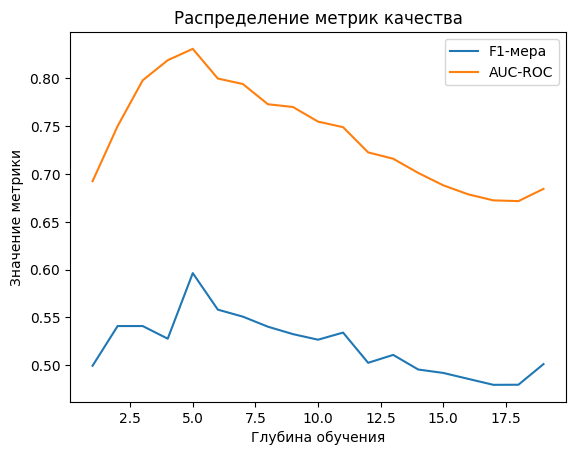

Для классификатора DecisionTreeClassifier:
 - лучшее качество F1-меры равно 0.596, которое было найдено при гиперпараметре max_depth равном 5;
 - лучшее качество AUC-ROC равно 0.831, которое было найдено при гиперпараметре max_depth равном 5.


In [24]:
# используем созданный ранее метод
dtc_balance_best_f1_score, dtc_balance_best_auc_roc_score, chart_data = decisionTreeClassifierScore(features_train, target_train, features_valid, target_valid, 20, class_weight='balanced')
# строим график
decisionTreeClassifierChart(chart_data)

# сохраняем лучший результат
best_score('DecisionTreeClassifier', dtc_balance_best_f1_score[0], 'Взвешивание классов')
# вывод информации
decisionTreeClassifierInfo(dtc_balance_best_f1_score, dtc_balance_best_auc_roc_score)

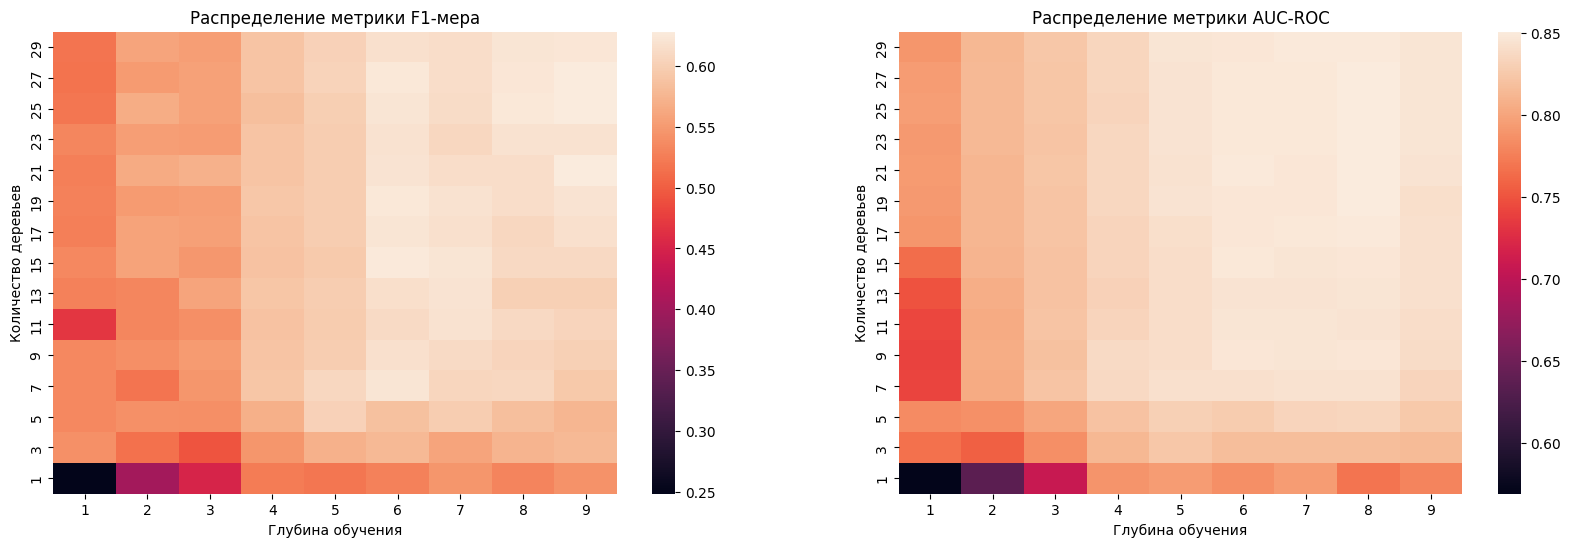

Для классификатора RandomForestClassifier:
 - лучшее качество F1-меры равно 0.628, которое было найдено при гиперпараметрах n_estimators равном 27 и max_depth равном 9;
 - лучшее качество AUC-ROC равно 0.851, которое было найдено при гиперпараметрах n_estimators равном 21 и max_depth равном 8.


In [25]:
# используем созданный ранее метод
rfc_balance_best_f1_score, rfc_balance_best_auc_roc_score, f1_chart_data, auc_roc_chart_data = randomForestClassifierScore(features_train, target_train, features_valid, target_valid, class_weight='balanced')
# строим график
randomForestClassifierChart(f1_chart_data, auc_roc_chart_data)

# сохраняем лучший результат
best_score('RandomForestClassifier', rfc_balance_best_f1_score[0], 'Взвешивание классов')
# вывод информации
randomForestClassifierInfo(rfc_balance_best_f1_score, rfc_balance_best_auc_roc_score)

In [26]:
# используем созданный ранее метод
lr_balance_best_f1_score, lr_balance_best_auc_roc_score, lr_balance_other_score = logisticRegressionScore(features_train, target_train, features_valid, target_valid, class_weight='balanced')
# сохраняем лучший результат
best_score('LogisticRegression', lr_balance_best_f1_score, 'Взвешивание классов')
# вывод информации
logisticRegressionInfo(lr_balance_best_f1_score, lr_balance_best_auc_roc_score)

Для классификатора LogisticRegression:
 - лучшее качество F1-меры равно 0.447;
 - лучшее качество AUC-ROC равно 0.713.


<b>Примечание</b>: значение метрики F1-мера стало гораздо лучше

In [27]:
print(f"""Полнота = {round(lr_balance_other_score[1], 3)}\nТочность = {round(lr_balance_other_score[0], 3)}""")

Полнота = 0.672
Точность = 0.335


In [28]:
info_best_score('Взвешивание классов')

Вывод: наилучшую метрику F1-мера показал классификатор RandomForestClassifier со значением 0.628


### Увеличение выборки

In [29]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # увеличение делается для выборок у которых целевой признак 1
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [30]:
# увеличиваем в 4 раза
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# проверяем текущий баланс
target_upsampled.value_counts()

0    4804
1    4784
Name: Exited, dtype: int64

Проверяем новые данные:

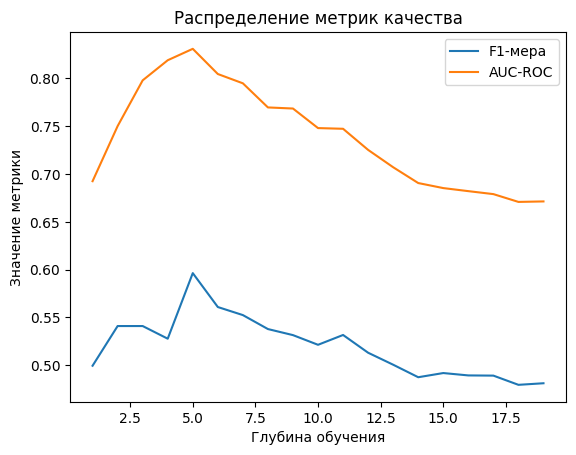

Для классификатора DecisionTreeClassifier:
 - лучшее качество F1-меры равно 0.596, которое было найдено при гиперпараметре max_depth равном 5;
 - лучшее качество AUC-ROC равно 0.831, которое было найдено при гиперпараметре max_depth равном 5.


In [31]:
# используем созданный ранее метод
dtc_upsample_best_f1_score, dtc_upsample_best_auc_roc_score, chart_data = decisionTreeClassifierScore(features_upsampled, target_upsampled, features_valid, target_valid, 20)
# строим график
decisionTreeClassifierChart(chart_data)

# сохраняем лучший результат
best_score('DecisionTreeClassifier', dtc_upsample_best_f1_score[0], 'Увеличение выборки')
# вывод информации
decisionTreeClassifierInfo(dtc_upsample_best_f1_score, dtc_upsample_best_auc_roc_score)

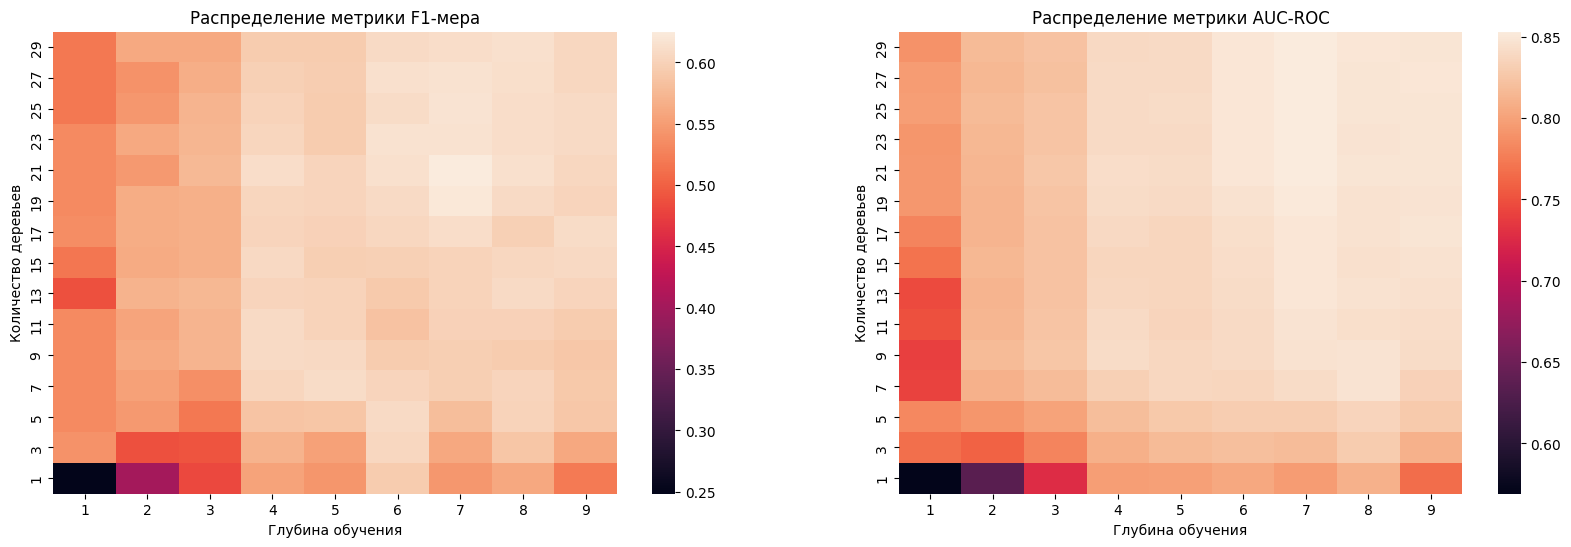

Для классификатора RandomForestClassifier:
 - лучшее качество F1-меры равно 0.625, которое было найдено при гиперпараметрах n_estimators равном 21 и max_depth равном 7;
 - лучшее качество AUC-ROC равно 0.853, которое было найдено при гиперпараметрах n_estimators равном 25 и max_depth равном 7.


In [32]:
# используем созданный ранее метод
rfc_upsample_best_f1_score, rfc_upsample_best_auc_roc_score, f1_chart_data, auc_roc_chart_data = randomForestClassifierScore(features_upsampled, target_upsampled, features_valid, target_valid)
# строим график
randomForestClassifierChart(f1_chart_data, auc_roc_chart_data)

# сохраняем лучший результат
best_score('RandomForestClassifier', rfc_upsample_best_f1_score[0], 'Увеличение выборки')
# вывод информации
randomForestClassifierInfo(rfc_upsample_best_f1_score, rfc_upsample_best_auc_roc_score)

In [33]:
# используем созданный ранее метод
lr_upsample_best_f1_score, lr_upsample_best_auc_roc_score, lr_upsample_other_score = logisticRegressionScore(features_upsampled, target_upsampled, features_valid, target_valid, class_weight='balanced')

# сохраняем лучший результат
best_score('LogisticRegression', lr_upsample_best_f1_score, 'Увеличение выборки')
# вывод информации
logisticRegressionInfo(lr_upsample_best_f1_score, lr_upsample_best_auc_roc_score)

Для классификатора LogisticRegression:
 - лучшее качество F1-меры равно 0.447;
 - лучшее качество AUC-ROC равно 0.713.


In [34]:
info_best_score('Увеличение выборки')

Вывод: наилучшую метрику F1-мера показал классификатор RandomForestClassifier со значением 0.625


### Уменьшение выборки

In [35]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [36]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

# проверяем текущий баланс
target_downsampled.value_counts()

0    1201
1    1196
Name: Exited, dtype: int64

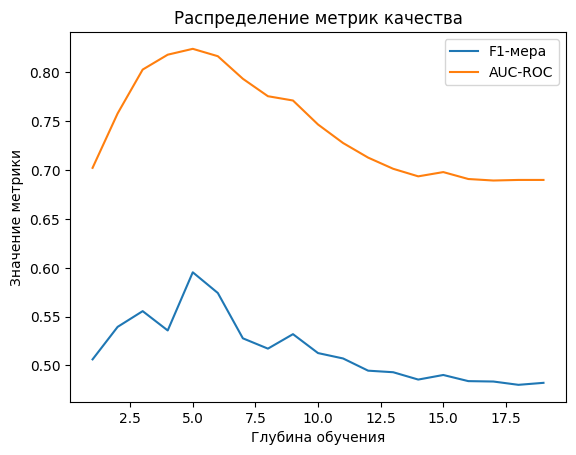

Для классификатора DecisionTreeClassifier:
 - лучшее качество F1-меры равно 0.595, которое было найдено при гиперпараметре max_depth равном 5;
 - лучшее качество AUC-ROC равно 0.824, которое было найдено при гиперпараметре max_depth равном 5.


In [37]:
# используем созданный ранее метод
dtc_downsample_best_f1_score, dtc_downsample_best_auc_roc_score, chart_data = decisionTreeClassifierScore(features_downsampled, target_downsampled, features_valid, target_valid, 20)
# строим график
decisionTreeClassifierChart(chart_data)

# сохраняем лучший результат
best_score('DecisionTreeClassifier', dtc_downsample_best_f1_score[0], 'Уменьшение выборки')
# вывод информации
decisionTreeClassifierInfo(dtc_downsample_best_f1_score, dtc_downsample_best_auc_roc_score)

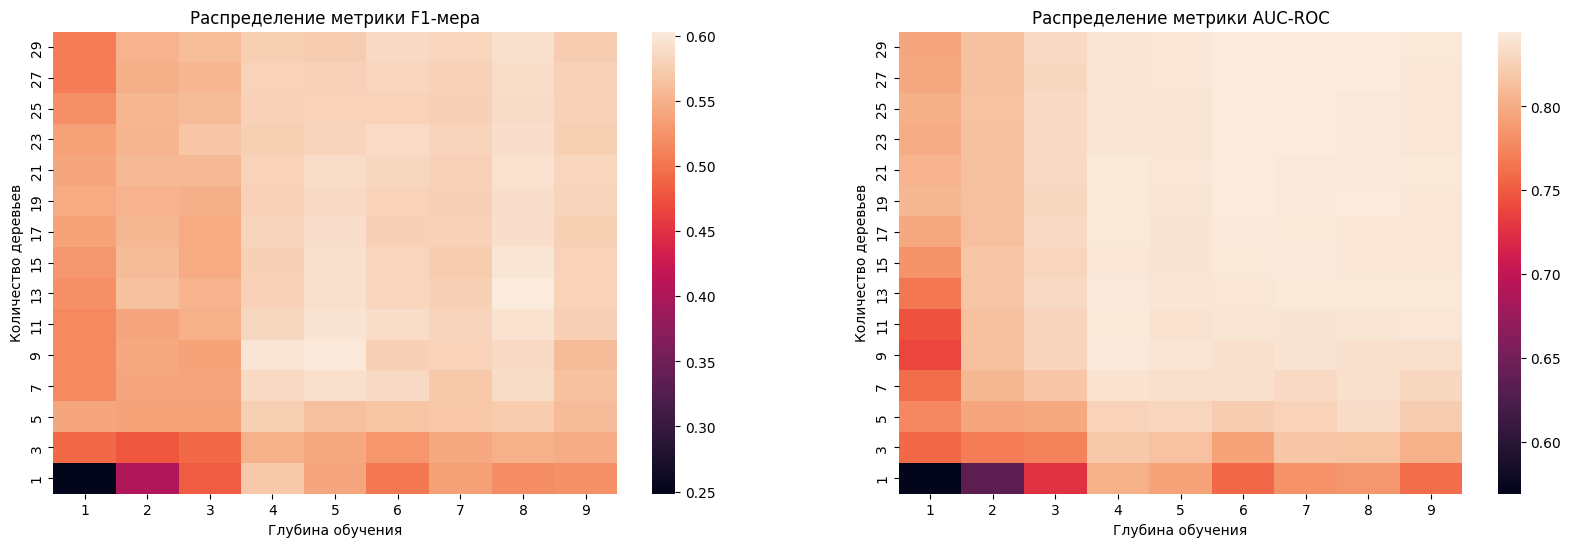

Для классификатора RandomForestClassifier:
 - лучшее качество F1-меры равно 0.603, которое было найдено при гиперпараметрах n_estimators равном 13 и max_depth равном 8;
 - лучшее качество AUC-ROC равно 0.845, которое было найдено при гиперпараметрах n_estimators равном 29 и max_depth равном 6.


In [38]:
# используем созданный ранее метод
rfc_downsample_best_f1_score, rfc_downsample_best_auc_roc_score, f1_chart_data, auc_roc_chart_data = randomForestClassifierScore(features_downsampled, target_downsampled, features_valid, target_valid)
# строим график
randomForestClassifierChart(f1_chart_data, auc_roc_chart_data)

# сохраняем лучший результат
best_score('RandomForestClassifier', rfc_downsample_best_f1_score[0], 'Уменьшение выборки')
# вывод информации
randomForestClassifierInfo(rfc_downsample_best_f1_score, rfc_downsample_best_auc_roc_score)

In [39]:
# используем созданный ранее метод
lr_downsample_best_f1_score, lr_downsample_best_auc_roc_score, lr_upsample_other_score = logisticRegressionScore(features_downsampled, target_downsampled, features_valid, target_valid, class_weight='balanced')

# сохраняем лучший результат
best_score('LogisticRegression', lr_downsample_best_f1_score, 'Уменьшение выборки')
# вывод информации
logisticRegressionInfo(lr_downsample_best_f1_score, lr_downsample_best_auc_roc_score)

Для классификатора LogisticRegression:
 - лучшее качество F1-меры равно 0.448;
 - лучшее качество AUC-ROC равно 0.712.


In [40]:
info_best_score('Уменьшение выборки')

Вывод: наилучшую метрику F1-мера показал классификатор RandomForestClassifier со значением 0.603


## Тестирование модели

In [41]:
# получаем лучшую метрику
best_method = 'unknown'
best_classifier = 'unknown'
best_score_method = 0

for method in dict_score:
    item = get_best_score(method)
    if item[1] > best_score_method:
        best_score_method = item[1]
        best_classifier = item[0]
        best_method = method
        
print(f'Лучшую метрику F1-мера {round(best_score_method, 3)} показал метод "{best_method}" с классификатором {best_classifier}.')

Лучшую метрику F1-мера 0.628 показал метод "Взвешивание классов" с классификатором RandomForestClassifier.


In [42]:
best_max_depth = rfc_balance_best_f1_score[1]
best_estimators = rfc_balance_best_f1_score[2]

print(f'Значение гиперпараметров лучшей модели: max_depth={best_max_depth} и n_estimators={best_estimators}')

Значение гиперпараметров лучшей модели: max_depth=9 и n_estimators=27


In [43]:
model = RandomForestClassifier(random_state=12345, n_estimators=best_estimators, max_depth=best_max_depth, class_weight='balanced')
model.fit(features_train, target_train)

predictions = model.predict(features_test)
f1 = f1_score(target_test, predictions)

print(f'F1-мера =', f1)

probabilities_valid = model.predict_proba(features_test)
auc_roc = roc_auc_score(target_test, probabilities_valid[:, 1])

print(f'AUC-ROC =', auc_roc)

F1-мера = 0.6104046242774566
AUC-ROC = 0.8494957808089394


<b>Общий вывод</b>: Наилучшее качество метрики F1-мера во всех экспериментах показывает классификатор RandomForestClassifier. Но он так же является самым трудозатратным по времени. Классификатор LogisticRegression показывает самые низкие результаты этой метрики, но при этом, как показало "обучение" он хорошо реагирует на присутствие "дисбаланса класса".

<i>Примечание автора</i>: итоговое качество F1-мера очень сильно зависит от того, как будут заполнены пропуски:
* строки с пропусками будут удалены - 0.600265604249668
* пропуски заполняются средним значением - 0.6057142857142858
* пропуски заполняются медианным значением - 0.5889447236180904

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*